# Explore spatial behavioral dependency

In this notebook, we explore whether the behavioral syllables have any spatial dependency (e.g. distance from center).

Open field assays (OFA) is common test for assessing anxiety-like behavior, and based on the natural aversion of mice to open spaces. The induced drugs may induce differences in aversiveness to open spaces, resulting in a spatially-dependent expression of behaviors.

We explore this possibility here.

In [1]:
import pickle

import numpy as onp

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

In [2]:
DATASET_DIR = "/home/groups/swl1/eyz/data/moseq-drugs/"

**Load session data**

In [3]:
filepath = DATASET_DIR + "original/fingerprints.pkl"
with open(filepath, 'rb') as f:
    fingerprints, fingerprint_labels = pickle.load(f, encoding='latin1')

In [4]:
# Extract the drug name and dosage associated with each session
session_drug_names_full = fingerprint_labels['drug']
session_drug_doses = fingerprint_labels['dose']  # units: mg/kg

# Use abbreviated drug names
drug_name_abbrv_map = {
    'alprazolam': 'ALPR',
    'atomoxetine': 'ATOM',
    'bupropion': 'BUPR',
    'chlorpromazine': 'CHKO',
    'citalopram': 'CITA',
    'clozapine': 'CLOZ',
    'control': 'CTRL',
    'diazepam': 'DIAZ',
    'fluoxetine': 'FLUO',
    'haloperidol': 'HALO',
    'methamphetamine': 'METH',
    'methylphenidate': 'MTPH',
    'modafinil': 'MODA',
    'phenelzine': 'PHEN',
    'risperidone': 'RISP',
    'venlafaxine': 'VENL',
}

session_drug_names = [
    drug_name_abbrv_map[name] for name in session_drug_names_full
]

In [5]:
session_drug_name_and_doses = onp.array([
    f'{drug}-{dose}' for drug, dose in zip(session_drug_names, session_drug_doses)
])

## Open original data

The "full" dataset, containing extracted depth images, scalar info (e.g. position, velocity, heading, etc.) and dimensionality reduced image features.

The load file is an ordered dict organized by individual sessions. Each session contains the 

In [6]:
filepath = DATASET_DIR + "original/dataset.pkl"

with open(filepath, 'rb') as f:
    original_data = pickle.load(f, encoding='latin1')

In [7]:
session_name = list(original_data.keys())[0]  # Get a random session name

max_len = max(list(map(len, original_data[session_name].keys())))
for name, val in original_data[session_name].items():
    info = f"{name}: " + " "*(max_len - len(name))
    info += f"shape {val.shape}" if isinstance(val, onp.ndarray) else f"{val}"
    print(info)

roi:            shape (24, 2)
angle:          shape (36000,)
dist_to_center: shape (36000,)
area:           shape (36000,)
mouse_img_idx:  slice(0, 35930, None)
centroid_y:     shape (36000,)
height:         shape (36000,)
width:          shape (36000,)
length:         shape (36000,)
good_idx:       shape (35930,)
velocity:       shape (36000,)
centroid_x:     shape (36000,)
data:           shape (36000, 10)
pca_components: shape (10, 3600)


We are interested in the `dist_to_center` scalar variable.

In [8]:
session_dists = onp.asarray([
    session_data["dist_to_center"].squeeze() for session_data in original_data.values()
])

print(f"{session_dists.shape=}")

session_dists.shape=(501, 36000)


In `A01-Preprocess-original-dataset.ipynb`, we had identifies that session 217 is likely a corrupted session and should be removed.

In [9]:
if len(session_dists) == 501:
    session_dists = onp.delete(session_dists, 217, axis=0)
else:
    print(f"Not deleting, {session_dists.shape=}")

if len(session_drug_names) == 501:
    session_drug_names = onp.delete(session_drug_names, 217)
else:
    print(f"Not deleting, {len(session_drug_names)=}")

if len(session_drug_doses) == 501:
    session_drug_doses = onp.delete(session_drug_doses, 217)
else:
    print(f"Not deleting, {len(session_drug_doses)=}")

if len(session_drug_name_and_doses) == 501:
    session_drug_name_and_doses = onp.delete(session_drug_name_and_doses, 217)
else:
    print(f"Not deleting, {len(session_drug_name_and_doses)=}")

In [10]:
selected_sessions = onp.nonzero(session_drug_name_and_doses == "CTRL-0")[0]

**TODO** BIN THE DISTANCES (this is what we would want to do anyways for use with behavioral syllables)

 ...]

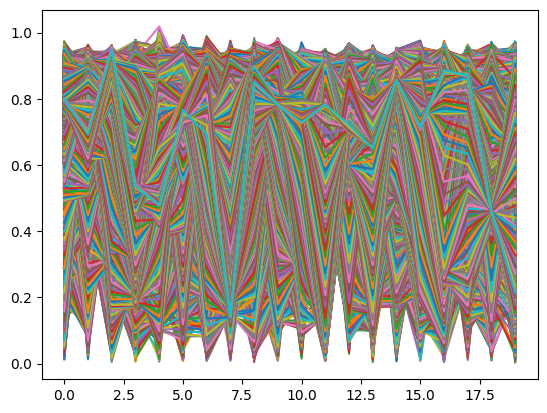

In [12]:
# plt.plot(session_dists[selected_sessions])

In [13]:
# plt.hist(session_dists[selected_sessions])

KeyboardInterrupt: 